# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [4]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [5]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [6]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
powers_df.shape

(667, 168)

In [8]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [9]:
heroes_df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [11]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [12]:
for col in heroes_df.columns:
    print(col, '\n', heroes_df[col].value_counts().head(), '\n\n')

name 
 Goliath       3
Spider-Man    3
Vindicator    2
Atlas         2
Namor         2
Name: name, dtype: int64 


Gender 
 Male      505
Female    200
-          29
Name: Gender, dtype: int64 


Eye color 
 blue     225
-        172
brown    126
green     73
red       46
Name: Eye color, dtype: int64 


Race 
 -                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
Name: Race, dtype: int64 


Hair color 
 -          172
Black      158
Blond       99
Brown       86
No Hair     75
Name: Hair color, dtype: int64 


Height 
 -99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64 


Publisher 
 Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
Name: Publisher, dtype: int64 


Skin color 
 -        662
green     21
red        9
blue       9
white      7
Name: Skin color, dtype: int64 


Alignment 
 good     

Looks like - has been used as placeholder values for some columns:

- Gender (29)
- Eye color (172)
- Race (304)
- Hair color (172)
- Skin color (662)
- Alignment (7)

And -99 has been used as placeholder values for Weight and Height columns:

- Weight (237)
- Height (217)

In [13]:
# Getting the summary statistics for numerical columns
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

- `Alignment` (a categorical column) has 7 missing values currently denoted as `-`. We can replace all these missing values as the most common category, which is `good` with 496 counts, since it is significantly higher than the second most common category `bad` with 207 counts.

- `Skin color` column has 662 placeholder values `-`, which takes up over 90% of the total dataset (total 734 rows) - we can drop this variable. 

- `Publisher` has 15 `NaN` values. In order to reserve as much data as possible, we can try to keep these `NaN` values by converting them to the string `'NaN'`. 

- `Weight` has 237 missing values denoted as `-99` and 2 as `NaN`, which takes up around 32% of the total dataset. Some entries have `Weight` values close to 900, such as Juggernaut with a `Height` of 287 and `Weight` 855. It would be reasonable to assume the `Weight` statistics for each `Race` and/or `Gender` group are be somewhat similar. We can replace the `NaN` values in `Weight` with the `mean()` of all valid inputs 


In [14]:
# Alignment
heroes_df.Alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: Alignment, dtype: int64

In [15]:
# Replace '-' with 'good'
heroes_df.Alignment.replace({'-': 'good'}, inplace=True)

In [16]:
heroes_df.Alignment.value_counts()

good       503
bad        207
neutral     24
Name: Alignment, dtype: int64

In [17]:
# Skin color - dropping column
heroes_df.drop(columns='Skin color', inplace=True)

In [18]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Alignment   734 non-null    object 
 8   Weight      732 non-null    float64
dtypes: float64(2), object(7)
memory usage: 51.7+ KB


In [19]:
# Publisher 
heroes_df.Publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
ABC Studios            4
Icon Comics            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
South Park             1
J. R. R. Tolkien       1
Microsoft              1
J. K. Rowling          1
Universal Studios      1
Titan Books            1
Rebellion              1
Hanna-Barbera          1
Name: Publisher, dtype: int64

In [20]:
# Replace NaN with the string 'NaN'
heroes_df.Publisher.fillna('NaN', inplace=True)

In [21]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   734 non-null    object 
 7   Alignment   734 non-null    object 
 8   Weight      732 non-null    float64
dtypes: float64(2), object(7)
memory usage: 51.7+ KB


In [22]:
# Weight
# Investigating max weight of Human Superheros
heroes_df[heroes_df.Weight == heroes_df[heroes_df.Race == 'Human'].Weight.max()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,neutral,855.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [23]:
# Check for duplicates in heroes_df
name_duplicates = heroes_df[heroes_df.duplicated(subset='name')]
duplicated_names = list(name_duplicates.name)

In [24]:
duplicated_names

['Angel',
 'Atlas',
 'Atom',
 'Batgirl',
 'Batman',
 'Black Canary',
 'Blizzard',
 'Blue Beetle',
 'Captain Marvel',
 'Firestorm',
 'Goliath',
 'Goliath',
 'Namor',
 'Nova',
 'Speedy',
 'Spider-Man',
 'Spider-Man',
 'Toxin',
 'Vindicator']

In [25]:
# Dropping duplicated entries that don't have valuable numerical data (for 'Height' or 'Weight')
to_drop = []
for n in duplicated_names:
    idxes = list(heroes_df[heroes_df.name == n].index)
    for i in idxes:
        if heroes_df.iloc[i].Height == -99 or heroes_df.iloc[i].Weight == -99:
            to_drop.append(i)

heroes_df.drop(index=to_drop, inplace=True)

In [26]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719 entries, 0 to 733
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        719 non-null    object 
 1   Gender      719 non-null    object 
 2   Eye color   719 non-null    object 
 3   Race        719 non-null    object 
 4   Hair color  719 non-null    object 
 5   Height      719 non-null    float64
 6   Publisher   719 non-null    object 
 7   Alignment   719 non-null    object 
 8   Weight      717 non-null    float64
dtypes: float64(2), object(7)
memory usage: 56.2+ KB


In [27]:
# Check for duplicates in powers_df
# There seems to be no duplicates
powers_df[powers_df.duplicated()].any().any()

False

In [28]:
# Rename hero_names column in powers_df to name
powers_df.rename(columns={'hero_names': 'name'}, inplace=True)

In [29]:
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Set 'name' as index for both heroes_df and power_df
heroes_df.set_index('name', inplace=True)
powers_df.set_index('name', inplace=True)

In [31]:
heroes_powers_df = heroes_df.join(powers_df, how='inner')

In [32]:
heroes_powers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, A-Bomb to Zoom
Columns: 175 entries, Gender to Omniscient
dtypes: bool(167), float64(2), object(6)
memory usage: 151.2+ KB


In [33]:
# Fill in NaN values in Weight column with the mean of valid weights (>0)
mean_valid_weights = heroes_powers_df[heroes_powers_df.Weight > 0].Weight.mean()
heroes_powers_df.Weight.fillna(mean_valid_weights, inplace=True)
heroes_powers_df.Weight.isna().sum()

0

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0.5, 1.0, 'Height and Weight Distribution for Male vs. Female Heroes')

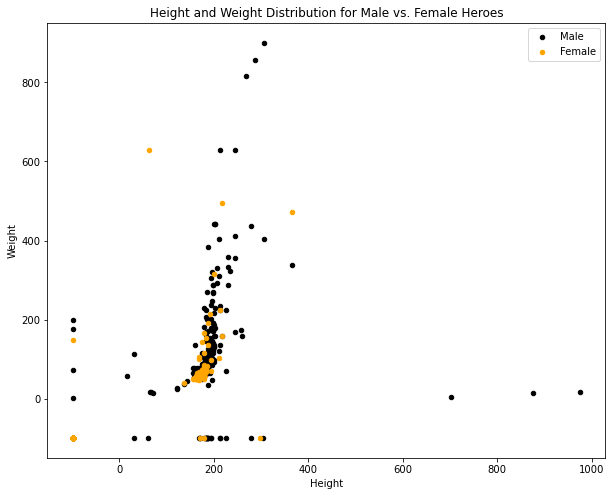

In [34]:
female_heroes_df = heroes_powers_df[heroes_powers_df.Gender == 'Female']
male_heroes_df = heroes_powers_df[heroes_powers_df.Gender == 'Male']

ax = male_heroes_df.plot.scatter(x='Height', y='Weight', c='black', label='Male', figsize=(10, 8))
female_heroes_df.plot.scatter(x='Height', y='Weight', c='orange', ax=ax, label='Female')
plt.legend()
plt.title('Height and Weight Distribution for Male vs. Female Heroes')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [35]:
# male_heroes_df = None
# female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    subset = dataframe[dataframe.Gender == gender][column_name]
    sns.set_style("whitegrid")
    ax = sns.displot(subset, kde=False, color='orange', edgecolor='black')
    # Add Mean line
    plt.axvline(subset.mean(), color='red', linestyle='dashed', linewidth=1, label="Mean")
    # Add Median line
    plt.axvline(subset.median(), color='green', linestyle='solid', linewidth=1, label="Median")
    # Add Mean+/-Std lines
    plt.axvline(subset.mean() - subset.std(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(subset.mean() + subset.std(), color='k', linestyle='dashed', linewidth=1)
    
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('{} Distribution of {} Heroes'.format(column_name.title(), gender.title()))
    plt.legend()
    plt.show()

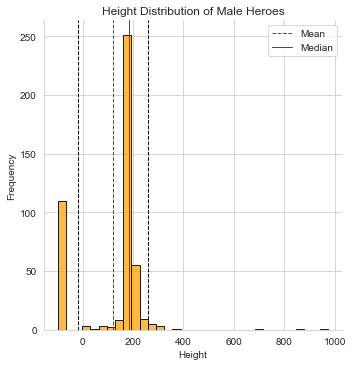

In [36]:
# Male Height
show_distplot(heroes_powers_df, 'Male', 'Height')

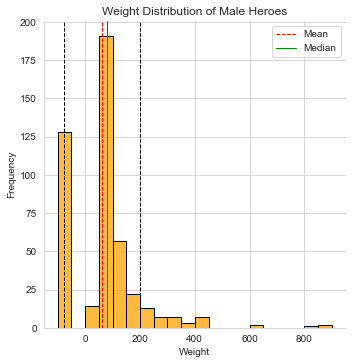

In [37]:
# Male Weight
show_distplot(heroes_powers_df, 'Male', 'Weight')

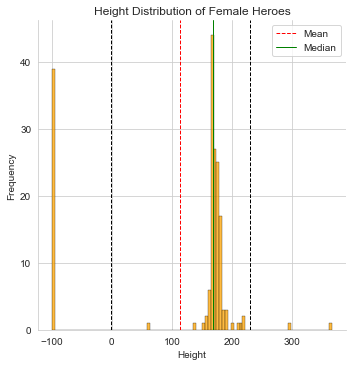

In [38]:
# Female Height
show_distplot(heroes_powers_df, 'Female', 'Height')

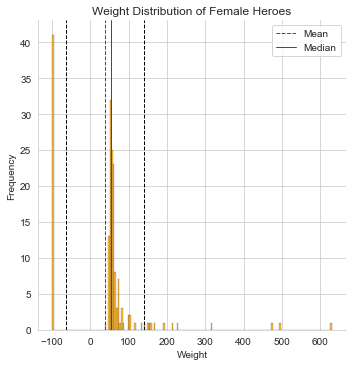

In [39]:
# Female Weight
show_distplot(heroes_powers_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
It seems like both Height and Weight are negatively skewed due to the -99 placeholder values.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [40]:
def top_5_powers(data):
    powers_counts = {col: data[col].sum() for col in powers_df.columns}
    top_5_powers = (sorted(powers_counts.items(), key=lambda pair: pair[1], reverse=True))[:5]
    return top_5_powers

In [41]:
# What are the 5 most common powers overall?
top_5_powers(heroes_powers_df)

[('Super Strength', 356),
 ('Stamina', 288),
 ('Durability', 258),
 ('Super Speed', 248),
 ('Agility', 242)]

In [42]:
# What are the 5 most common powers in the Marvel Universe?
marvel_df = heroes_powers_df[heroes_powers_df.Publisher == 'Marvel Comics']
top_5_powers(marvel_df)

[('Super Strength', 203),
 ('Durability', 152),
 ('Stamina', 149),
 ('Super Speed', 136),
 ('Agility', 125)]

In [43]:
# What are the 5 most common powers in the DC Universe?
dc_df = heroes_powers_df[heroes_powers_df.Publisher == 'DC Comics']
top_5_powers(dc_df)

[('Super Strength', 105),
 ('Stamina', 86),
 ('Flight', 83),
 ('Super Speed', 78),
 ('Agility', 71)]

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
- `Super Strength` seems to be the most popular power in all datasets (joined, Marvel and DC). `Stamina`, `Super Speed` and `Agility` are also very popular among different superhero universes. 
- DC Universe has `Flight` as the 4th most popular power, which is not in entire Superheroes's top 5. 
- Marvel's top 5 is almost identical with the entire Superheroes dataset's top 5, with the exception of `Durability` and `Stamina` switching places.



### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________
Question of choice: Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?

Co-occuring Chance Calculation Approach:
1. Slicing the power columns from the dataframe interested
2. Converting True/False boolean values in the power dataframe to 1/0 relatively
3. Create a cooccurence matrix based on the 1/0 version of the power dataframe
4. Get the coordinates of the maximum value of the coocurrence matrix, and trace back to power column names from there.

In order to reuse these calculation, we can make it a function, and then apply it on different Gender dataframes to investigate the differences between Female & Male Superheroes.

Haven't figured out how to visualize these findings...


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [44]:
def highest_occurence_powers(data):
    # Slicing the powers columns from the dataframe of interest
    powers_in_data = data[powers_df.columns]
    
    # Converting True/False to 1/0 in the new powers df
    pows = powers_in_data.applymap(lambda x: int(x))
    
    # Create a coocurrence_matrix for the powers
    cooccurrence_matrix = np.dot(pows.transpose(), pows)
    # Resetting diagonal values to 0
    np.fill_diagonal(cooccurrence_matrix, 0)
    
    # Locate the coordinates of highest value in cooccurrence matrix
    locations = np.where(cooccurrence_matrix == cooccurrence_matrix.max())
    coordinates_lst = list(zip(locations[0], locations[1]))

    # Sort the values in each tuples returned in coordinates to eliminate duplicates:
    coordinates = set(list(map(lambda x: tuple(sorted(x)), coordinates_lst)))
    
    # Convert coordinates to power names:
    power_pairs = [(pows.columns[each[0]], pows.columns[each[1]]) for each in coordinates]
        
    return power_pairs

In [45]:
# The power pairs with highest co-occurence value in the entire Superheroes dataset
highest_occurence_powers(heroes_powers_df)

[('Durability', 'Super Strength')]

In [46]:
# The power pairs with highest co-occurence value in the Female Superheroes dataset
highest_occurence_powers(female_heroes_df)

[('Super Strength', 'Super Speed')]

In [47]:
# The power pairs with highest co-occurence value in the Male Superheroes dataset
highest_occurence_powers(male_heroes_df)

[('Durability', 'Super Strength')]

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data